In [45]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [46]:
data=pd.read_csv("clean_data_for_analysis.csv")

In [47]:
data

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [48]:
features=data[['Release', 'Runtime', 'Genre', 'Budget', 'Platform']]
features

,Release,Runtime,Genre,Budget,Platform
0,2018-01-05,6180.0,Horror,10000000.0,others
1,2018-01-05,5700.0,Action,NaN,others
2,2018-04-06,6780.0,Adventure,NaN,others
3,2018-01-12,6240.0,Action,30000000.0,others
4,2018-01-12,5460.0,Comedy,NaN,others
...,...,...,...,...,...
1148,2022-12-16,11520.0,Action,350000000.0,others
1149,2022-12-21,6120.0,Animation,90000000.0,others
1150,2022-12-30,6360.0,Documentary,NaN,others
1151,2022-12-23,11340.0,Comedy,78000000.0,others


In [49]:
convert_to_unix = lambda x: int(datetime.strptime(x, '%Y-%m-%d').timestamp())

features['Release']=features['Release'].apply(convert_to_unix)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_13750/2456918480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Release']=features['Release'].apply(convert_to_unix)


In [175]:
# Create a OneHotEncoder for Genre
encoder = OneHotEncoder()
genre=features['Genre']
one_hot = encoder.fit_transform(features[['Genre']])
one_hot_df = pd.DataFrame(one_hot.toarray())
df_genre=pd.concat([genre, one_hot_df], axis=1)

df_genre['Genre']=genre
df_genre=df_genre.drop(columns='Genre')
df_genre.columns=encoder.categories_

In [51]:
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()
platform=features['Platform']
one_hot = encoder.fit_transform(features[['Platform']])
one_hot_df = pd.DataFrame(one_hot.toarray())
df_platform = pd.concat([platform, one_hot_df], axis=1)

df_platform['Platform']=platform
df_platform=df_platform.drop(columns='Platform')
df_platform.columns=encoder.categories_

In [107]:
df_platform

,amazon,disney,hulu,netflix,others
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1148,0.0,0.0,0.0,0.0,1.0
1149,0.0,0.0,0.0,0.0,1.0
1150,0.0,0.0,0.0,0.0,1.0
1151,0.0,0.0,0.0,0.0,1.0


# Drop the NaN from original data and merge the data together

In [171]:
colum_names_1=[i[0] for i in df_genre.columns]#Because names are tuples from encoder object
# column_names_2=[i[0] for i in df_platform.columns]
df_genre.columns=colum_names_1
# df_platform.columns=column_names_2


no_nan_features=features.dropna(how='any')
no_nan_features_genre=no_nan_features.drop(columns='Genre')
no_nan_features=pd.concat([no_nan_features_genre, df_genre], join='inner', axis=1)

In [176]:
no_nan_features

,Release,Runtime,Budget,Platform,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
0,1515139200,6180.0,10000000.0,others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1515744000,6240.0,30000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1516348800,7800.0,35000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1516348800,8400.0,30000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1516348800,6480.0,3500000.0,others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1148,1671177600,11520.0,350000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,1671609600,6120.0,90000000.0,others,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,1671782400,11340.0,78000000.0,others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
labels=data['Metascore']
labels

0       49.0
1       26.0
2       88.0
3       56.0
4       54.0
        ... 
1148    67.0
1149    73.0
1150    71.0
1151    60.0
1152    51.0
Name: Metascore, Length: 1153, dtype: float64

In [177]:
first_set=pd.concat([no_nan_features, labels], join='inner', axis=1)
first_set=first_set.drop(columns='Platform')
first_set=first_set.dropna()

first_set

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller,Metascore
0,1515139200,6180.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,1515744000,6240.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
7,1516348800,7800.0,35000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
8,1516348800,8400.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
9,1516348800,6480.0,3500000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
1148,1671177600,11520.0,350000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
1149,1671609600,6120.0,90000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0
1151,1671782400,11340.0,78000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [68]:
# first_set=preprocessing.StandardScaler().fit_transform(first_set)

In [86]:
first_set.shape

(485, 20)

In [121]:
X_train, X_test, y_train, y_test=train_test_split(first_set.iloc[:,:19], first_set.iloc[:,19], train_size=.70)

In [88]:
X_train

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
555,1602831600,5940.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
763,1627628400,7620.0,200000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,1553842800,6540.0,6000000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718,1623394800,8580.0,55000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,1562914800,5580.0,16000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1670572800,7920.0,120000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,1527836400,6000.0,5000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
417,1579852800,5640.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,1597993200,6120.0,5000000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [123]:
# making predictions
predictions = model.predict(X_test)

In [124]:
predictions

array([63.96340137, 53.62499657, 55.44408307, 55.50522385, 54.50003974,
       52.88010655, 48.03017304, 52.52255451, 58.55631982, 45.8835741 ,
       59.22623593, 46.58132907, 96.00502558, 57.24752276, 52.54277425,
       50.32315699, 56.73375061, 66.97509832, 50.32181208, 74.024773  ,
       61.98787109, 57.13541336, 57.77134953, 56.17756752, 47.74228127,
       53.49035526, 59.94173062, 48.22110378, 66.44141757, 59.08655864,
       56.2138431 , 56.05820325, 57.05817977, 51.66310843, 52.37153536,
       64.26045624, 59.37481965, 62.85434974, 55.65452826, 47.20307682,
       49.29252433, 51.06344423, 62.91557192, 57.51139093, 52.13965079,
       58.79657149, 53.88595303, 57.45194515, 63.28680372, 64.14530957,
       65.94716517, 52.95316311, 53.29418387, 44.3651178 , 69.84491562,
       68.23441818, 64.72146481, 49.42741072, 65.92698663, 63.2675568 ,
       65.08514211, 68.00964168, 61.79088936, 59.9020567 , 68.57092061,
       53.49395016, 68.54806538, 49.14872525, 74.303224  , 54.86

In [125]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  230.36221915712937
mean_absolute_error :  12.004559393692361


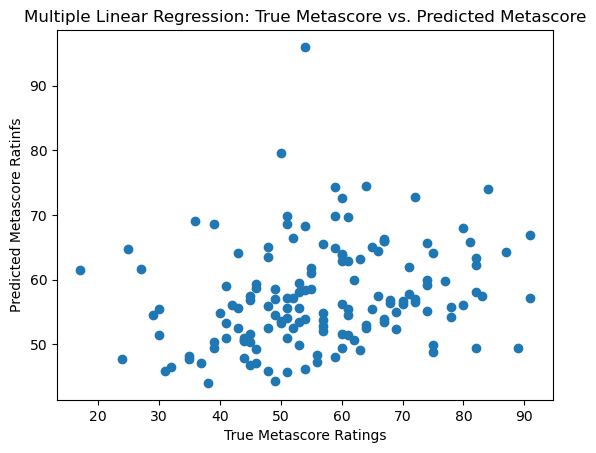

In [126]:
plt.scatter(y_test, predictions)
plt.xlabel("True Metascore Ratings")
plt.ylabel("Predicted Metascore Ratinfs")
plt.title("Multiple Linear Regression: True Metascore vs. Predicted Metascore")
plt.show()

In [127]:
residuals = y_test - predictions

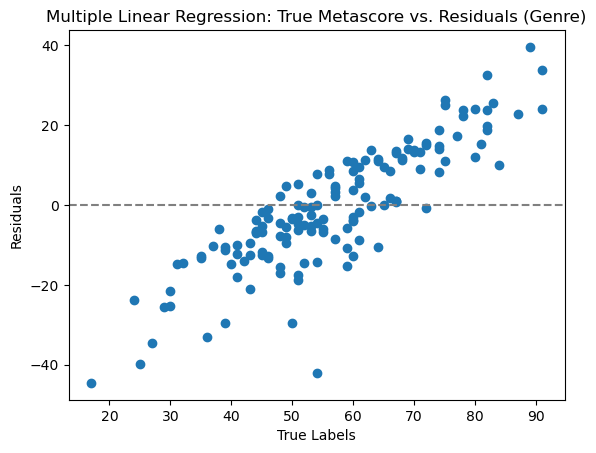

In [128]:
plt.scatter(y_test, residuals)
plt.xlabel("True Labels")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.title("Multiple Linear Regression: True Metascore vs. Residuals (Genre)")
plt.show()

# Same Analysis with Platform Variables

In [110]:
# colum_names_1=[i[0] for i in df_genre.columns]#Because names are tuples from encoder object
column_names_2=[i[0] for i in df_platform.columns]
# df_genre.columns=colum_names_1
df_platform.columns=column_names_2


no_nan_features=features.dropna(how='any')
no_nan_features_platform=no_nan_features.drop(columns='Platform')
no_nan_features=pd.concat([no_nan_features_platform, df_platform], join='inner', axis=1)

In [111]:
no_nan_features

,Release,Runtime,Genre,Budget,amazon,disney,hulu,netflix,others
0,1515139200,6180.0,Horror,10000000.0,0.0,0.0,0.0,0.0,1.0
3,1515744000,6240.0,Action,30000000.0,0.0,0.0,0.0,0.0,1.0
7,1516348800,7800.0,Action,35000000.0,0.0,0.0,0.0,0.0,1.0
8,1516348800,8400.0,Action,30000000.0,0.0,0.0,0.0,0.0,1.0
9,1516348800,6480.0,Comedy,3500000.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,Drama,10000000.0,0.0,0.0,0.0,0.0,1.0
1148,1671177600,11520.0,Action,350000000.0,0.0,0.0,0.0,0.0,1.0
1149,1671609600,6120.0,Animation,90000000.0,0.0,0.0,0.0,0.0,1.0
1151,1671782400,11340.0,Comedy,78000000.0,0.0,0.0,0.0,0.0,1.0


In [129]:
second_set=pd.concat([no_nan_features, labels], join='inner', axis=1)
second_set=second_set.drop(columns='Genre')
second_set=second_set.dropna()

second_set

,Release,Runtime,Budget,amazon,disney,hulu,netflix,others,Metascore
0,1515139200,6180.0,10000000.0,0.0,0.0,0.0,0.0,1.0,49.0
3,1515744000,6240.0,30000000.0,0.0,0.0,0.0,0.0,1.0,56.0
7,1516348800,7800.0,35000000.0,0.0,0.0,0.0,0.0,1.0,54.0
8,1516348800,8400.0,30000000.0,0.0,0.0,0.0,0.0,1.0,49.0
9,1516348800,6480.0,3500000.0,0.0,0.0,0.0,0.0,1.0,36.0
...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,0.0,0.0,0.0,0.0,1.0,60.0
1148,1671177600,11520.0,350000000.0,0.0,0.0,0.0,0.0,1.0,67.0
1149,1671609600,6120.0,90000000.0,0.0,0.0,0.0,0.0,1.0,73.0
1151,1671782400,11340.0,78000000.0,0.0,0.0,0.0,0.0,1.0,60.0


In [130]:
X_train, X_test, y_train, y_test=train_test_split(second_set.iloc[:,:8], second_set.iloc[:,8], train_size=.70)


model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

array([56.97306319, 50.48936637, 56.76355546, 47.10730302, 62.53730404,
       55.78477355, 56.58005249, 53.51852538, 52.1615873 , 49.20580718,
       54.72954644, 50.55327708, 51.75061537, 54.88545896, 54.18795947,
       63.79703756, 57.75843538, 59.5380674 , 59.31039034, 55.2429655 ,
       58.36342901, 55.4700321 , 68.75652268, 60.79483821, 50.42916436,
       52.27814739, 55.47189686, 59.14599389, 46.85094672, 50.05049135,
       50.69521893, 59.35585903, 60.76440511, 57.41579691, 59.54685752,
       54.83761736, 54.77964603, 59.21884353, 62.61942194, 50.91098538,
       51.35347753, 53.96336817, 61.95112474, 66.66111528, 53.23828543,
       62.95846575, 59.1129132 , 56.41287239, 59.13095336, 67.07842838,
       58.87110995, 49.56925516, 49.94915771, 53.7425082 , 58.57828613,
       66.86220507, 54.7979464 , 55.56372333, 52.23956985, 53.9457894 ,
       59.25676311, 63.03961807, 54.17955791, 48.23138617, 49.89295649,
       54.09763199, 52.26705618, 49.83975025, 56.50463139, 57.60

In [131]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  208.47208582859722
mean_absolute_error :  11.608144612184725


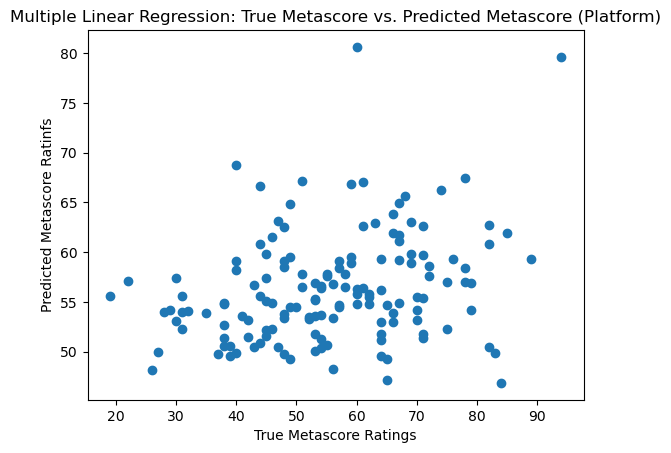

In [135]:
plt.scatter(y_test, predictions)
plt.xlabel("True Metascore Ratings")
plt.ylabel("Predicted Metascore Ratinfs")
plt.title("Multiple Linear Regression: True Metascore vs. Predicted Metascore (Platform)")
plt.show()

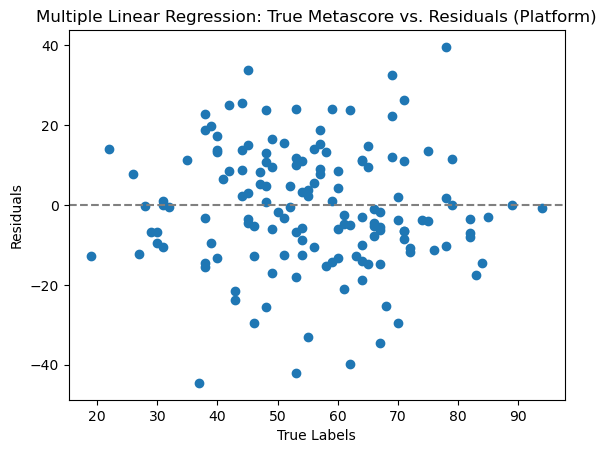

In [134]:
plt.scatter(y_test, residuals)
plt.xlabel("True Labels")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.title("Multiple Linear Regression: True Metascore vs. Residuals (Platform)")
plt.show()

# MLPRegressor for Metascore

In [141]:
pre_covid=data.iloc[:450]
post_covid=data.iloc[450:]

In [146]:
pre_covid['Nominations']=pre_covid['Nominations'].fillna(0)
post_covid['Nominations']=post_covid['Nominations'].fillna(0)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_13750/942387375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid['Nominations']=pre_covid['Nominations'].fillna(0)
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_13750/942387375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid['Nominations']=post_covid['Nominations'].fillna(0)


In [154]:
post_covid[post_covid['Platform']=='amazon']

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
483,7500,Movie,2020-06-18,5580.0,Action,0.0,58.0,6.3,30280,tt6436726,NaN,NaN,amazon
511,Chemical Hearts,Movie,2020-08-21,5580.0,Drama,0.0,57.0,6.3,13915,tt5843876,NaN,NaN,amazon
543,The Lie,Movie,2020-10-06,5820.0,Drama,0.0,45.0,5.8,18240,tt7945440,NaN,NaN,amazon
544,Black Box,Movie,2020-10-06,6000.0,Horror,0.0,62.0,6.2,15806,tt12298506,NaN,32668.0,amazon
551,Nocturne,Movie,2020-10-13,5400.0,Drama,0.0,58.0,5.7,10119,tt11044858,NaN,NaN,amazon
552,Evil Eye,Movie,2020-10-13,5400.0,Horror,0.0,54.0,4.8,3950,tt12882620,NaN,NaN,amazon
562,Borat Subsequent Moviefilm,Movie,2020-10-23,5700.0,Comedy,2.0,68.0,6.6,144883,tt13143964,NaN,NaN,amazon
594,Uncle Frank,Movie,2020-11-25,5700.0,Comedy,1.0,58.0,7.3,21487,tt11327514,NaN,NaN,amazon
619,Sylvie's Love,Movie,2020-12-23,6840.0,Drama,1.0,74.0,6.8,6160,tt9827834,NaN,NaN,amazon
642,Bliss,Movie,2021-02-05,6180.0,Drama,0.0,40.0,5.3,18762,tt10333426,NaN,NaN,amazon


In [208]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [174]:
first_set

array([[-1.48852401, -0.65499763, -0.74911307, ...,  0.        ,
        -0.06434895, -0.47734767],
       [-1.47602093, -0.60228918, -0.42641985, ...,  0.        ,
        -0.06434895, -0.04553436],
       [-1.46351784,  0.76813062, -0.34574655, ...,  0.        ,
        -0.06434895, -0.16890959],
       ...,
       [ 1.74620365, -0.70770609,  0.54165979, ...,  0.        ,
        -0.06434895,  1.00315509],
       [ 1.74977596,  3.8779294 ,  0.34804386, ...,  0.        ,
        -0.06434895,  0.2012161 ],
       [ 1.74977596,  1.50604898, -0.18439994, ...,  0.        ,
        -0.06434895, -0.35397244]])

In [178]:
scaled=preprocessing.StandardScaler().fit_transform(first_set.iloc[:,:3])

In [182]:
labels=first_set['Metascore']
first_set=first_set.drop(columns='Metascore')

In [185]:
first_set=first_set.drop(columns=['Release', 'Runtime', 'Budget'])

In [188]:
first_set=first_set.to_numpy()

In [192]:
features=np.concatenate((first_set, scaled), axis=1)

In [193]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, train_size=.70)

model = MLPRegressor(max_iter=1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([ 45.37186143,  59.08631409,  56.10039638,  66.48073949,
        60.87311723,  67.31156739,  46.05435459,  57.70035952,
        62.29923945,  52.42673832,  64.95281622,  49.85780856,
        65.22316219,  51.24889965,  64.12537112,  45.95858611,
        38.52115143,  67.82260335,  55.5905346 ,  50.34127935,
        49.90064501,  49.07083525,  59.82744023,  63.78303721,
        56.29256068,  56.23753015,  72.83344897,  55.41093935,
        58.54486118,  56.31432761,  50.08115417,  42.18286825,
        59.15434366,  55.60757113,  53.63761748,  54.22022917,
        60.32999516,  52.42369227,  57.35263874,  51.76122863,
        55.54891462,  90.21622413,  53.2074413 ,  56.91039621,
        51.39376246,  90.34025429,  54.24452175,  56.69221564,
        75.596306  ,  48.84578365,  55.39261364,  63.68035854,
        50.29017848,  60.40821028,  53.43485293,  60.73698797,
        59.07936152,  45.41050517,  53.1522025 ,  58.99685348,
        60.95692357,  62.90746466,  58.39407552,  59.54

In [194]:
mse = mean_squared_error(y_test, predictions)

In [195]:
mse

257.81156795351257

In [198]:
data['Gross'].isna().sum()

316

# MLPClassifier to Predict Genre based on Gross, Runtime, Metascore

In [201]:
data

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [203]:
subset=data[['Gross', 'Runtime', 'Metascore', 'Genre']]
subset.isna().sum()

Gross        316
Runtime        0
Metascore    100
Genre          0
dtype: int64

In [204]:
subset=subset.dropna()

In [217]:
labels=subset['Genre']
features=subset.loc[:,:'Metascore']
features=preprocessing.StandardScaler().fit_transform(features)


labels=labels.to_numpy().reshape(-1,1)
labels=preprocessing.OneHotEncoder().fit_transform(labels)
labels=labels.toarray()

In [218]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, train_size=.70)

model = MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [219]:
model.score(X_test, y_test)

0.10256410256410256

# Its a terrrrrible